# Esercitazione 9

Nella cartella di quest'esercitazione ci sono:
- Il programma ed i codici per la creazione delle configurazioni iniziali.
- Il programma ed i codici per l'algoritmo genetico.
- File di output ed input.
- Il makefile.
- File per la classe random.

<img src="Menu.png">

Per compilare il codice bisogna aggiungere l'inclusione automatica della libreria `random.h` con i seguenti comandi:

```bash
cd .. #Vado nella cartella con il file setup.sh
source setup.sh
```

In questa esercitazione viene utilizzata `armadillo` perciò bisogna includerla a mano se non avviene automaticamente.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

## 1. Algoritmo Genetico: Problema del Commesso Viaggiatore

L'algoritmo genetico serve per i problemi di ottimizzazione e consiste in immagazzinare i nostri parametri, detti geni, in gruppi, cioè individui.  Utiliziamo un insime di individui per definire una generazione.  Andando avanti con il tempo e con le generazioni gli individui si accoppieranno, mescolando i geni, ed avverranno mutazioni genetiche negli individui.

Il nostro problema è far visitare tutte le città di un determinato set una ed una sola volta, tornando alla città di partenza.

Nel nostro caso i geni sono l'ordine in cui il commesso visita le varie città e sono immagazinate in vettori:

$$
[1,5,6,...,27,14]
$$

Ricordandoci che il commesso deve tornare nella città di partenza, qundi dobbiamo utilizzare le condizioni periodiche al contorno, qundi dopo l'ultima città del vettore il commesso torna alla prima.

Ogni individuo è caratterizzato da una funzione costo $L$ definita:
$$
L=\sum_{i=1}^N|\vec{x}_i-\vec{x}_{i+1}|^2
$$
Questa valuterà la bontà del mio individuo, minore la funzione costo maggiore il mio individuo è vicino alla soluzione.  Ogni volta che selezioneremo un individuo terremo conto di prendere più facilmente i migliori della generazione.

Ad ognuna delle seguenti azioni bisogna attribuirle una probabilità.

### 1.1 Mescolamento/Crossover

Selezioniamo due genitori ed estraiamo un numero $m$ di geni da lasciare invariati.  I due figli avranno i primi $m$ geni uguali ad uno dei due genitori e la restante parte viene ordinata nello stesso modo dell'altro genitore.

*Esempio*:

$m=2$

__Genitori__

$[1,2|3,4,5] , [5,4|3,2,1]$

__Figli__

$[1,2|5,4,3] , [5,4|1,2,3]$

### 1.2 Mutazioni Genetiche

Selezioniamo un individuo per modificare i suoi geni in uno dei seguenti modi.

__Mescolamento__

Consiste nell'invertire due geni dell'individuo.

Per esempio scambiamo il secondo ed il quarto gene.
$$
[1,2,3,4,5]\to[1,4,3,2,5]
$$

__Permutazione__

Consiste in uno scambio di $m$ geni contigui di $n$ posti.

Per esempio la permutazione dal primo gene con $m=2$ e $n=3$.

$$
[1,2,3,4,5]\to[4,5,3,1,2]
$$

__Inversione__

Invertiamo l'ordine di $m$ geni contigui.

Per esempio prendiamo dal quaro gene e $m=5$.
$$
[1,2,3,4,5]\to[1,5,4,3,2]
$$


### 1.3 Percorso su una Circonferenza

Iniziamo a studiare il precorso migliore passando su dei punti casuali di una circonferenza, visto che il precorso migliore sarà quello più simile alla circonferenza.

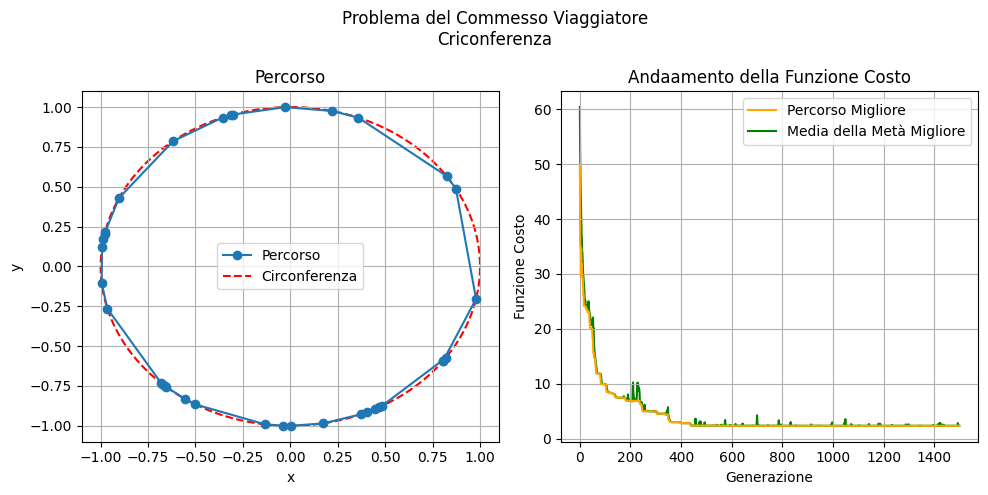

In [61]:
circle=np.loadtxt("circle.out")
loss=np.loadtxt("loss_circle.out")

#Close the circle
circle=np.append(circle,circle[0])
circle=np.reshape(circle,(np.shape(circle)[0]//2,2))

#Ideal circle
theta=np.linspace(0,2*np.pi,1000)
x=np.sin(theta)
y=np.cos(theta)

fig, ax=plt.subplots(1,2,figsize=(10,5))

#Trajector
ax[0].plot(circle[:,0],circle[:,1],marker='o',label="Percorso",zorder=2)
ax[0].plot(x,y,color='red',label="Circonferenza",linestyle='dashed',zorder=1)

ax[1].plot(loss[:,0],loss[:,1],color='orange',label="Percorso Migliore",zorder=2)
ax[1].plot(loss[:,0],loss[:,2],color='green',label="Media della Metà Migliore",zorder=1)

ax[0].set_title("Percorso")
ax[0].set(xlabel='x',ylabel='y')

ax[1].set_title(f"Andaamento della Funzione Costo")
ax[1].set(xlabel="Generazione",ylabel="Funzione Costo")

for i in range(2):
    ax[i].grid(True)
    ax[i].legend()

plt.suptitle(f"Problema del Commesso Viaggiatore\nCriconferenza")
plt.tight_layout()

plt.show()

Osserviamo che l'algoritmo continua a diminuire la funzione costo, sia del miglior inividuo che la media della miglior metà.  Infine troviamo come percorso atteso quello che ci aspettavamo. 

### 1.4 Percorso in un Quadrato

Ora che abbiamo testato il nostro algoritmo applichiamolo ad un caso meno banale, quindi a dei punti casuali in un quadralo.

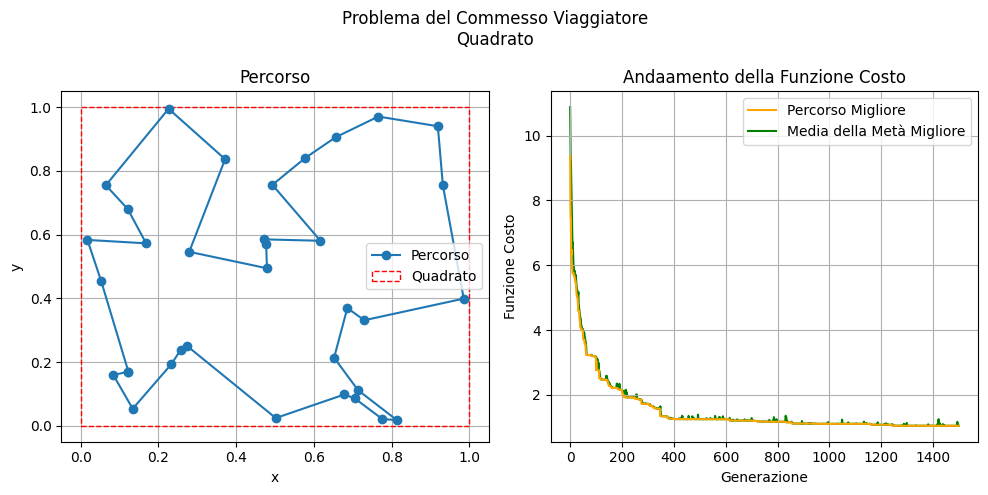

In [60]:
from matplotlib.patches import Rectangle
circle=np.loadtxt("square.out")
loss=np.loadtxt("loss_square.out")

#Close the circle
circle=np.append(circle,circle[0])
circle=np.reshape(circle,(np.shape(circle)[0]//2,2))

#Ideal circle
theta=np.linspace(0,2*np.pi,1000)
x=np.sin(theta)
y=np.cos(theta)

fig, ax=plt.subplots(1,2,figsize=(10,5))

#Trajector
ax[0].plot(circle[:,0],circle[:,1],marker='o',label="Percorso",zorder=3)
ax[0].add_patch(Rectangle((0,0),1,1,fill=False,edgecolor='red',label="Quadrato",linestyle='dashed',zorder=2))

ax[1].plot(loss[:,0],loss[:,1],color='orange',label="Percorso Migliore",zorder=2)
ax[1].plot(loss[:,0],loss[:,2],color='green',label="Media della Metà Migliore",zorder=1)

ax[0].set_title("Percorso")
ax[0].set(xlabel='x',ylabel='y')

ax[1].set_title(f"Andaamento della Funzione Costo")
ax[1].set(xlabel="Generazione",ylabel="Funzione Costo")

for i in range(2):
    ax[i].grid(True)
    ax[i].legend()

plt.suptitle(f"Problema del Commesso Viaggiatore\nQuadrato")
plt.tight_layout()

plt.show()

Osserviamo che anche in questo caso l'algoritmo diminuisce la funzione costo di entrambi i casi detti in precedenza e trova un risultato ragionevole.